In [1]:
!pip install pandas  --upgrade
!pip install matplotlib --upgrade
!pip install scikit-image --upgrade
!pip install pillow  --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#library importing 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import io
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage import filters
from skimage.measure import label, regionprops, regionprops_table

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


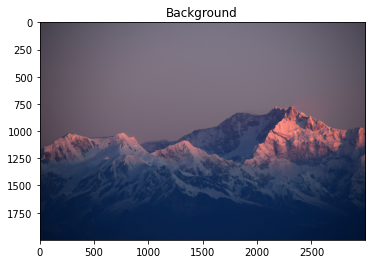

In [4]:
#loading Background image
image = io.imread("/content/drive/MyDrive/Video-Generator/image.jpeg")
plt.title("Background")
plt.imshow(image)
plt.show()

In [5]:
shape=image.shape
print('shape = ',shape)

shape =  (2000, 2992, 3)


# Simple Linear Iterative clustering For Color Segmented Label Data

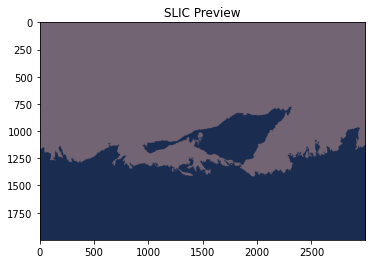

In [6]:
 # Applying Simple Linear Iterative clustering
label  = slic(image,n_segments=2,compactness=15,start_label=1)
plt.imshow(label2rgb(label,image,kind = 'avg'))
plt.title("SLIC Preview")
plt.show()

# Edge Detection of Image clusters

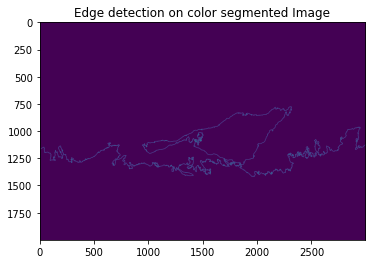

In [7]:
#edge detection on segmented Image
plt.imshow(filters.roberts(label*100))
plt.title("Edge detection on color segmented Image")
plt.show()

In [8]:
#label data characteristic
uni_label = np.unique(label)
uni_label_freq=np.unique(label,return_counts=True)
print("Number of Unique Labels=",len(uni_label),"\n\nUnique Labels with Frequency=",uni_label_freq)

Number of Unique Labels= 2 

Unique Labels with Frequency= (array([1, 2]), array([3508969, 2475031]))


In [9]:
#converting image and label data into 1d for processing
image_1d=image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
label_1d=np.reshape(label,-1)

# Characteristics of Colour Segmented  Image

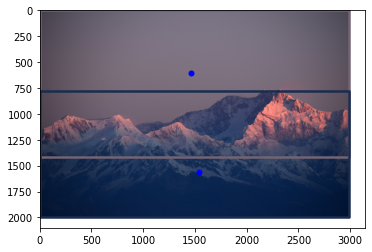

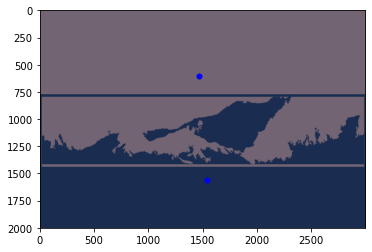

In [10]:
# finding Characteristics of each labels/segment
info=pd.DataFrame(data =[], index =uni_label, columns =['color','freq','percentage','centriod','xmax','xmin','ymax','ymin','majoraxislength','orientation'])

fig,(ax)=plt.subplots()
fig2,(ay)=plt.subplots()
ax.imshow(image)
ay.imshow(label2rgb(label,image,kind = 'avg').astype('int8'))
i=1
regions=regionprops(label)
for props in regions:
    
    #color mean
    loc=np.where(label_1d==i)[0]
    info.at[i,'color'] = np.append((np.mean(image_1d[loc,:],axis=0)).astype('uint8'),[1],axis=0)
    c=(np.mean(image_1d[loc,:],axis=0))/255.0
    #frequency of label
    info.at[i,'freq'] = uni_label_freq[1][i-1]
    
    #label percentage
    info.at[i,'percentage'] = (uni_label_freq[1][i-1]*100)/(shape[0]*shape[1])
    
    #centriod of segment 
    y0, x0 = props.centroid
    info.at[i,'centriod']=[int(x0),int(y0)]
    
    # major-axis length 
    info.at[i,'majoraxislength']=props.major_axis_length
    
    # major axis orientation angle
    info.at[i,'orientation']=props.orientation
    
    
    #outer layout for colour segment
    ymin,xmin,ymax,xmax = props.bbox
    
    info.at[i,'xmax']=xmax
    info.at[i,'xmin']=xmin
    info.at[i,'ymax']=ymax
    info.at[i,'ymin']=ymin
    
    #plotting layouts and their centriod
    
    ax.plot(x0, y0,'.b', markersize=10)
    ay.plot(x0, y0,'.b', markersize=10)
    
    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, color=c, linewidth=2.5)
    ay.plot(bx, by, color=c, linewidth=2.5)
    ay.axis((0,shape[1],shape[0], 0))
    i=i+1 

plt.show()

In [11]:
print(info)

                color     freq percentage      centriod  xmax xmin  ymax ymin  \
1  [114, 100, 114, 1]  3508969  58.639188   [1463, 602]  2992    0  1419    0   
2     [26, 44, 80, 1]  2475031  41.360812  [1541, 1562]  2992    0  2000  777   

  majoraxislength orientation  
1     3464.390079   -1.549201  
2     3436.189408   -1.533149  


#Simple Poster genration


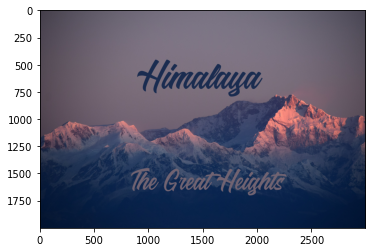

In [12]:
font = ImageFont.truetype(font='/content/drive/MyDrive/Video-Generator/Riverside FREE.ttf', size=320)
font1 = ImageFont.truetype(font='/content/drive/MyDrive/Video-Generator/Riverside FREE.ttf', size=230)
# Create a new image onto which the text will be added
image1 = Image.open('/content/drive/MyDrive/Video-Generator/image.jpeg')
# Create an ImageDraw object onto which the font text will be placed
draw = ImageDraw.Draw(image1)
# Draw the text onto our image
draw.text((info.centriod[1]), anchor='mm', text="Himalaya", font=font, fill=tuple(info.color[2]))
draw.text((info.centriod[2]), anchor='mm', text="The Great Heights", font=font1, fill=tuple(info.color[1]))
plt.imshow(np.asarray(image1))
image1.save('/content/drive/MyDrive/Video-Generator/result.jpeg')